In [52]:
# Mappa CMB (z 1000)
# Bisogna fare su sfera
import numpy as np
import matplotlib.pyplot as plt

import camb
import healpy as hp # per le mappe CMB

Healpix lavor acon le mappe, pacchetto storico che gestisce dati sul piano del cielo; con definizione in pixel. Genera mappe che per py sono liste numere, array. Le sa fare a varie risoluzione per campionare varie scale angolari. 

In [53]:
n_side = 256 # parametro risoluzione
hp.nside2npix(n_side) #Sto pixellixando in questi pixel

786432

In [54]:
hp.nside2pixarea(256, degrees=True) #scala angolare di risoluzione

0.052455852825697924

In [55]:
#Array a caso
hp_map = np.arange(hp.nside2npix(256))

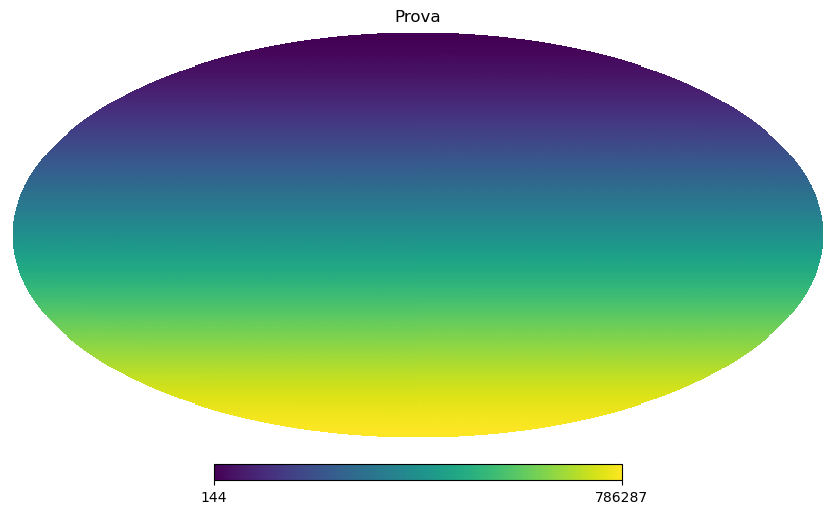

In [56]:
hp.mollview(hp_map, title='Prova') # ogni quadratino è pixel sulla sfera; se alta risoluzione è praticmaente un continuo
#più alta risoluzione più pixel e computer esplode

In [57]:
#Supponiamo avere survay con oggetti puntiformi da paizzare
hp.ang2pix(nside=256, theta=np.pi/2, phi=0)#data posizione dice in che pixel cade

391680

Fondo cosmico mappa temperatura da CMB 

In [58]:
Omega_b = 0.05
Omega_c = 0.25

h = 0.7
As = 2.1e-9
ns = 0.96

pars= camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns);

result =camb.get_results(pars)

power = result.get_cmb_power_spectra(pars, CMB_unit='muK')

In [59]:
power.keys()

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

In [60]:
C_l = power['unlensed_scalar']

In [61]:
C_l.shape #2401 numero multipoli calcolo spetrro potenza, mentre 4 è tipi di spettri dentro

(2401, 4)

In [62]:
C_l = power['unlensed_scalar'][:,0] # tutti l , ma solo in temperatura

In [63]:
ells = np.arange(len(C_l))

Text(0, 0.5, 'C_l')

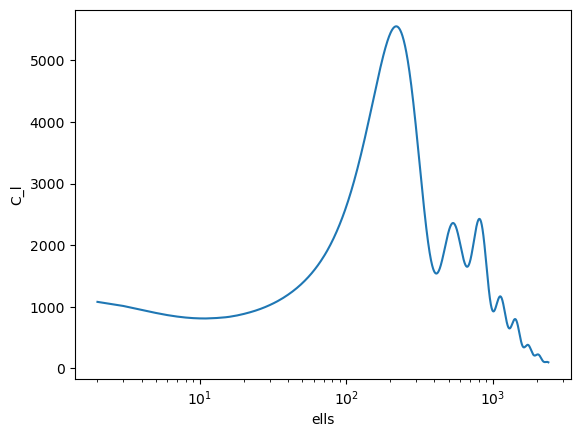

In [64]:
plt.semilogx(ells[2:], C_l[2:])
plt.xlabel('ells')
plt.ylabel('C_l')


In [65]:
#Dargli C_l non normalizzati e portati in K
power = result.get_cmb_power_spectra(pars, CMB_unit='K', raw_cl=True)

C_l = power['unlensed_scalar'][:, 0]


Text(0, 0.5, 'C_l')

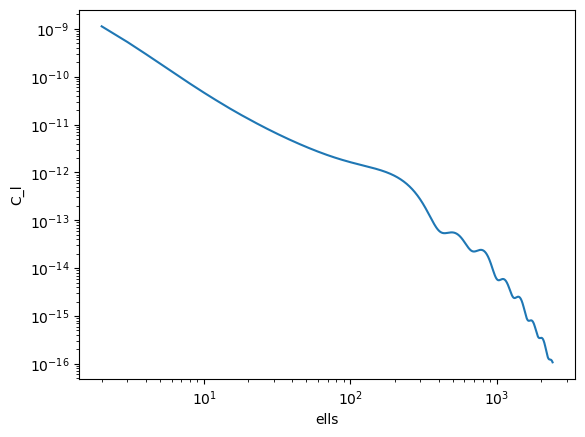

In [66]:
plt.loglog(ells[2:], C_l[2:])
plt.xlabel('ells')
plt.ylabel('C_l')

In [67]:
alms = hp.synalm(C_l)

In [68]:
alms.shape #per ogni l, 2l+1 valori di m

(2883601,)

Text(0, 0.5, 'C_l')

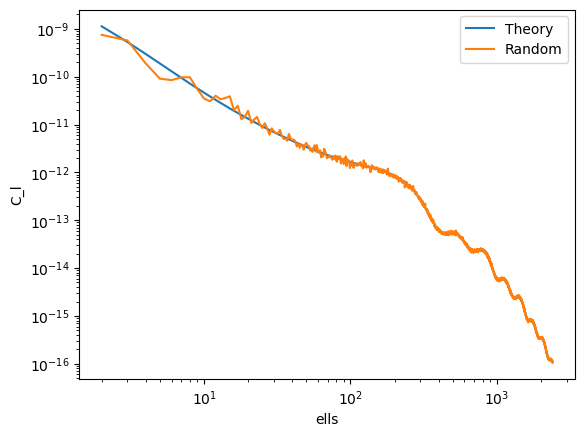

In [69]:
plt.loglog(ells[2:], C_l[2:], label='Theory')
plt.loglog(ells[2:], hp.alm2cl(alms)[2:], label='Random')
plt.legend(loc='best')
plt.xlabel('ells')
plt.ylabel('C_l')

Ricord:
$$
C_l=\Sigma \abs{a_{lm}}^2
$$

In [70]:
#Mappa 

mock_map=hp.alm2map(alms, nside=1024)

In [71]:
mock_map.shape

(12582912,)

In [72]:
hp.nside2pixarea(256, degrees=True)#poco meno grado quadro

0.052455852825697924

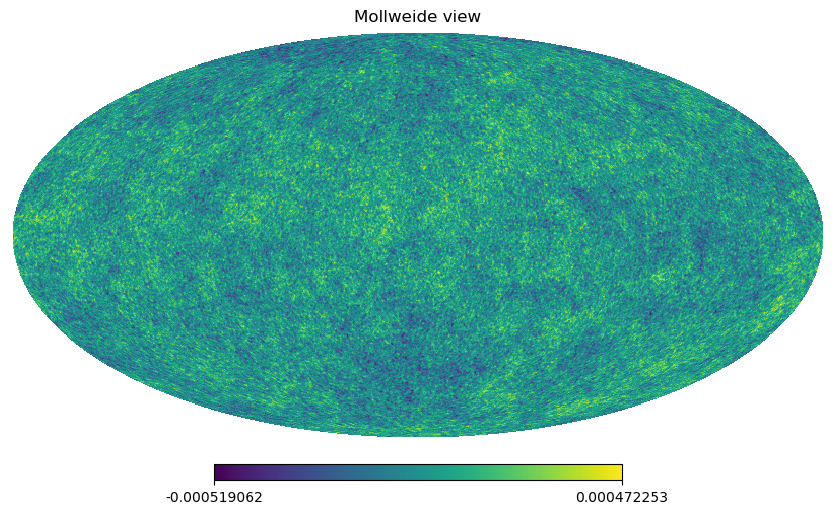

In [73]:
hp.mollview(mock_map)

In [74]:
# Misuriamo C_l del campo dalla mappa
C_meas = hp.anafast(mock_map, lmax=2048)

In [75]:
C_meas.shape

(2049,)

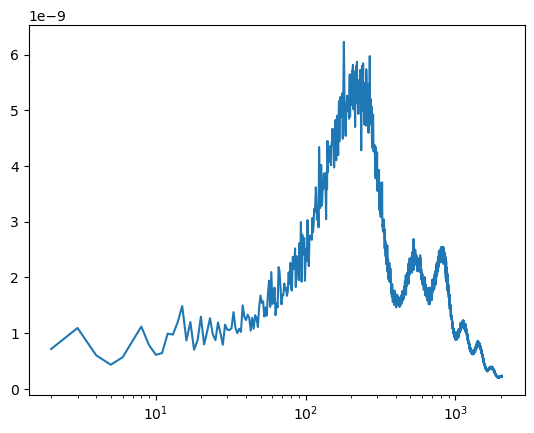

In [78]:
ell_measured = np.arange(len(C_meas))
plt.semilogx(ell_measured[2:], C_meas[2:]* ell_measured[2:]* (ell_measured[2:]+1)/(2*np.pi))


Misura con noise e da fare confronto con teoria.